In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt





C:\Users\dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
text=pd.read_csv("a1_RestaurantReviews_HistoricDump.tsv",sep='\t')

In [6]:
text

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
895,I want to first say our server was great and w...,1
896,The pizza selections are good.,1
897,"I had strawberry tea, which was good.",1
898,Highly unprofessional and rude to a loyal patron!,0


In [7]:
text.shape

(900, 2)

In [8]:
text.value_counts()

Review                                                                                                                    Liked
I won't be back.                                                                                                          0        2
I love this place.                                                                                                        1        2
I would not recommend this place.                                                                                         0        2
The food was terrible.                                                                                                    0        2
!....THE OWNERS REALLY REALLY need to quit being soooooo cheap let them wrap my freaking sandwich in two papers not one!  0        1
                                                                                                                                  ..
I was seated immediately.                                                 

In [9]:
text.isnull().sum()

Review    0
Liked     0
dtype: int64

In [10]:
stop =stopwords.words('english')



In [11]:
text['Review']=text['Review'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [12]:
text['Review']=text['Review'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))

In [13]:
text['Review']

0                                    wow... loved place.
1                                            crust good.
2                                   tasty texture nasty.
3      stopped late may bank holiday rick steve recom...
4                           selection menu great prices.
                             ...                        
895         want first say server great perfect service.
896                               pizza selections good.
897                                strawberry tea, good.
898             highly unprofessional rude loyal patron!
899                           overall, great experience.
Name: Review, Length: 900, dtype: object

In [14]:
punc=string.punctuation

In [15]:
text['Review']=text['Review'].apply(lambda x:" ".join(x for x in x.split() if x not in punc))

In [16]:
text['Review']

0                                    wow... loved place.
1                                            crust good.
2                                   tasty texture nasty.
3      stopped late may bank holiday rick steve recom...
4                           selection menu great prices.
                             ...                        
895         want first say server great perfect service.
896                               pizza selections good.
897                                strawberry tea, good.
898             highly unprofessional rude loyal patron!
899                           overall, great experience.
Name: Review, Length: 900, dtype: object

In [17]:
text['Review']=text['Review'].apply(lambda x:" ".join(x for x in x.split() if x not in ("[A-Z]+")))

In [18]:
text['Review']

0                                    wow... loved place.
1                                            crust good.
2                                   tasty texture nasty.
3      stopped late may bank holiday rick steve recom...
4                           selection menu great prices.
                             ...                        
895         want first say server great perfect service.
896                               pizza selections good.
897                                strawberry tea, good.
898             highly unprofessional rude loyal patron!
899                           overall, great experience.
Name: Review, Length: 900, dtype: object

In [19]:
text

,Review,Liked
0,wow... loved place.,1
1,crust good.,0
2,tasty texture nasty.,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great prices.,1
...,...,...
895,want first say server great perfect service.,1
896,pizza selections good.,1
897,"strawberry tea, good.",1
898,highly unprofessional rude loyal patron!,0


In [20]:
cv=CountVectorizer()

In [21]:
x=cv.fit_transform(text['Review']).toarray()


In [22]:
x.shape

(900, 1829)

In [23]:
y=text['Liked'].values.reshape(-1)

In [24]:
y.shape

(900,)

In [25]:
import pickle
pickle.dump(cv,open("text_file.pkl","wb"))

In [26]:
from sklearn.model_selection import train_test_split

In [34]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=0)

# fitting the Gaussian model

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [36]:
gnb=GaussianNB()
gnb.fit(train_x,train_y)


GaussianNB()

In [59]:
y_pred=gnb.predict(test_x)
accuracy_score(test_y,y_pred)


0.6777777777777778

In [60]:
confusion_matrix(test_y,y_pred)

array([[65, 13],
       [45, 57]], dtype=int64)

In [61]:
classification_report(test_y,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.59      0.83      0.69        78\n           1       0.81      0.56      0.66       102\n\n    accuracy                           0.68       180\n   macro avg       0.70      0.70      0.68       180\nweighted avg       0.72      0.68      0.68       180\n'

In [62]:
import pickle
pickle.dump(gnb,open("Gaussian.pkl","wb"))

In [63]:
dataset=pd.read_csv("a2_RestaurantReviews_FreshDump.tsv",sep='\t')

In [64]:
dataset

,Review
0,Spend your money elsewhere.
1,Their regular toasted bread was equally satisf...
2,The Buffet at Bellagio was far from what I ant...
3,"And the drinks are WEAK, people!"
4,-My order was not correct.
...,...
95,I think food should have flavor and texture an...
96,Appetite instantly gone.
97,Overall I was not impressed and would not go b...
98,"The whole experience was underwhelming, and I ..."


In [65]:
dataset['Review']=dataset['Review'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [66]:
dataset

,Review
0,spend your money elsewhere.
1,their regular toasted bread was equally satisf...
2,the buffet at bellagio was far from what i ant...
3,"and the drinks are weak, people!"
4,-my order was not correct.
...,...
95,i think food should have flavor and texture an...
96,appetite instantly gone.
97,overall i was not impressed and would not go b...
98,"the whole experience was underwhelming, and i ..."


In [67]:
dataset['Review']=dataset['Review'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))

In [68]:
dataset['Review']=dataset['Review'].apply(lambda x:" ".join(x for x in x.split() if x not in punc))

In [69]:
dataset['Review']=dataset['Review'].apply(lambda x:" ".join(x for x in x.split() if x not in ("[A-Z]+")))

In [70]:
dataset

,Review
0,spend money elsewhere.
1,regular toasted bread equally satisfying occas...
2,buffet bellagio far anticipated.
3,"drinks weak, people!"
4,-my order correct.
...,...
95,think food flavor texture lacking.
96,appetite instantly gone.
97,overall impressed would go back.
98,"whole experience underwhelming, think we'll go..."


In [71]:
import pickle
cv=pickle.load(open("text_file.pkl","rb"))

In [72]:
x_fresh=cv.transform(dataset['Review']).toarray()

In [73]:
x_fresh.shape

(100, 1829)

In [74]:
gnb=pickle.load(open("Gaussian.pkl","rb"))

In [75]:
y_predict=gnb.predict(x_fresh)

In [76]:
dataset['predict_label']=y_predict.tolist()

In [77]:
dataset.head()

,Review,predict_label
0,spend money elsewhere.,0
1,regular toasted bread equally satisfying occas...,1
2,buffet bellagio far anticipated.,1
3,"drinks weak, people!",0
4,-my order correct.,0


In [78]:
dataset['predict_label'].value_counts()

0    77
1    23
Name: predict_label, dtype: int64

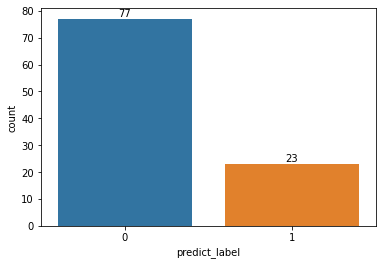

In [79]:
ax=sns.countplot(x=dataset['predict_label'])
for i in ax.containers:
    ax.bar_label(i)


above graph clearly represents that Feedback provided by customer is negative.77% customer are providing negtive reviews while postive review customers are only 23%.
above graph`and review analyis clearly indicates that there is strong need to improvement like quality of food,service delivery,employe behaviour...etc.